# NLP Assignment

In [ ]:
Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts 
Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. 
Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately.
Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed
in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical
application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents 
a blog post with the following columns:
Text: The content of the blog post. Column name: Data
Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such 
as TF-IDF.
2. Naive Bayes Model for Text Classification
Split the data into training and test sets.
Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use 
    libraries like scikit-learn for this purpose.
Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
Choose a suitable library or method for performing sentiment analysis on the blog post texts.
Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider
only the Data column and get the sentiment for each blog.
Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
Discuss the performance of the model and any challenges encountered during the classification process.
Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines
Your submission should include a comprehensive report and the complete codebase.
Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria
Correct implementation of data preprocessing and feature extraction.
Accuracy and robustness of the Naive Bayes classification model.
Depth and insightfulness of the sentiment analysis.
Clarity and thoroughness of the evaluation and discussion sections.
Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the blog posts dataset!


🔍 Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.90      0.86        20
           comp.graphics       0.58      0.88      0.70        17
 comp.os.ms-windows.misc       0.91      0.95      0.93        22
comp.sys.ibm.pc.hardware       0.82      0.75      0.78        24
   comp.sys.mac.hardware       0.80      0.91      0.85        22
          comp.windows.x       0.94      0.71      0.81        24
            misc.forsale       0.88      0.78      0.82        18
               rec.autos       0.89      0.89      0.89        19
         rec.motorcycles       0.81      1.00      0.90        13
      rec.sport.baseball       1.00      0.87      0.93        23
        rec.sport.hockey       0.75      1.00      0.86        15
               sci.crypt       0.29      0.91      0.44        11
         sci.electronics       1.00      0.34      0.51        32
                 sci.med       1.00      0.56    

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

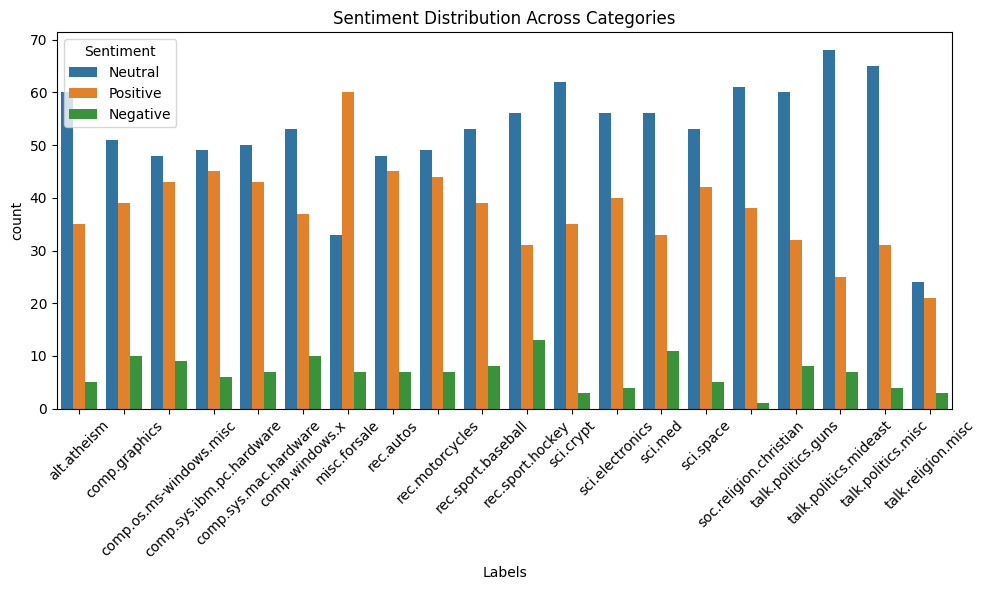

In [8]:
***import csv
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

#  Step 1: Read CSV safely (handling parsing error)
data = []
with open(r'C:\Users\hp\Downloads\blogs.9LTVk36T.csv.part', encoding="utf-8", errors="ignore") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row.get("Data") and row.get("Labels"):
            data.append(row)
df = pd.DataFrame(data)

#  Step 2: Preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text

df['Cleaned_Data'] = df['Data'].apply(preprocess)

#  Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

#  Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 5: Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

#  Step 6: Evaluate Model
y_pred = model.predict(X_test)
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 7: Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

#  Step 8: Plot sentiment distribution by category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.title("Sentiment Distribution Across Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()